<a href="https://colab.research.google.com/github/who-knows-its-nebulose/chair-style-classifier/blob/main/Train_chair_style.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!pip install split_folders
# import splitfolders

In [ ]:
# Split 70:15:15 into training, validation and test

# splitfolders.ratio('/content/drive/My Drive/colabdownloads/chairs/', output="/content/drive/My Drive/DS_projects/chair_classifier/", seed=1337, ratio=(.7, 0.15,0.15))

Copying files: 1414 files [08:53,  2.65 files/s]


In [ ]:
#Import libraries
import os
import numpy as np
from pathlib import Path
import re
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

#variables
img_height = 224
img_width = 224
batch_size = 32

N_CLASSES = 5
TOTAL_EPOCHS = 50

#path
data_path = '/content/drive/My Drive/DS_projects/chair_classifier/'
train_data_path = data_path + 'train/'
val_data_path = data_path + 'val/'
test_data_path = data_path + 'test/'

#importing data
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   #shear_range=0.2,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1. / 255)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_path,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(val_data_path,
                                                        target_size=(img_height, img_width),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_data_path,
                                                        target_size=(img_height, img_width),
                                                        batch_size=batch_size,
                                                        shuffle = False,
                                                        class_mode='categorical')




Found 987 images belonging to 5 classes.
Found 211 images belonging to 5 classes.
Found 216 images belonging to 5 classes.
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

[0. 0. 0. 0. 1.]


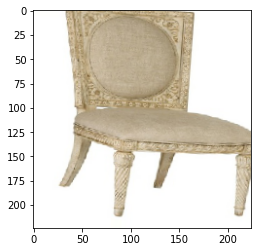

[0. 0. 0. 0. 1.]


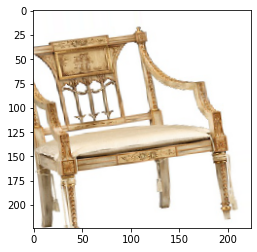

[0. 1. 0. 0. 0.]


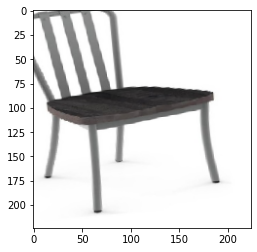

[1. 0. 0. 0. 0.]


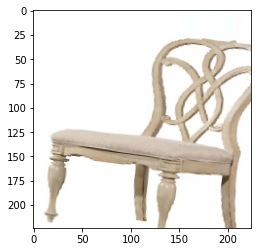

In [ ]:
x,y = train_generator.next()
for i in range(0,4):
    image = x[i]
    label = y[i]
    print (label)
    plt.imshow(image)
    plt.show()
    

In [ ]:

from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.layers.experimental import preprocessing



preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input


base_model = tf.keras.applications.MobileNetV2(input_shape=(img_height, 
                                                           img_width,
                                                              3),
                                               include_top=False,
                                               weights='imagenet',
                                               alpha = 1.4)


# preprocess_input = tf.keras.applications.vgg16.preprocess_input

# base_model = tf.keras.applications.VGG16(
#     include_top=False,
#     weights="imagenet",
#     input_tensor=None,
#     input_shape=(img_height, img_width, 3)
#     )

base_model.trainable = False





#build model

inputs = tf.keras.Input(shape=(img_height, img_width, 3))
preprocessed_input = preprocess_input(inputs)
base_model_out = base_model(preprocessed_input, training=False)
pooled = GlobalAveragePooling2D()(base_model_out)
drop1 = Dropout(0.2)(pooled)
dense1 = Dense(256, activation = 'relu')(drop1)
drop2 = Dropout(0.3)(dense1)
dense2 = Dense(128, activation = 'relu')(drop2)
drop3 = Dropout(0.2)(dense2)
outputs = Dense(5, activation='softmax')(drop3)
model = tf.keras.Model(inputs, outputs)


len(model.trainable_variables)


6

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam

checkpoint_filepath = "/content/drive/My Drive/Colab Notebooks/checkpoints_test/{epoch:02d}_{val_accuracy:.4f}.h5"
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy', 
    mode='max', 
    verbose=1,    
    save_best_only=True)   
 
reduce_lr =  ReduceLROnPlateau(patience=2, monitor='val_accuracy', factor = 0.25 , min_lr=1e-6, verbose=1)

early_stopping = EarlyStopping(patience=3, monitor='val_accuracy', restore_best_weights=True, mode='max',verbose=1,min_delta=0.001)
          
Callbacks=[model_checkpoint_callback, reduce_lr, early_stopping]    

In [ ]:
TRAIN_DATASET_SIZE = len(train_generator)
VAL_DATASET_SIZE   = len(val_generator)

# Weighted losses for class equilibrium
# unique, counts = np.unique(ds_train.class_names, return_counts=True)
# class_weights = dict(zip(unique, np.true_divide(counts.sum(), N_CLASSES*counts)))
#/content/drive/My Drive/Colab Notebooks


# Prepare model to run
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
              )
INITIAL_EPOCH = 0
# Start training the model
history = model.fit(train_generator,
                    epochs=TOTAL_EPOCHS,
                    verbose=1,
                    steps_per_epoch=TRAIN_DATASET_SIZE,
                    validation_data=val_generator,
                    validation_steps=VAL_DATASET_SIZE,
                    initial_epoch=INITIAL_EPOCH,
                    #workers = 4,
                    callbacks=[model_checkpoint_callback, reduce_lr, early_stopping]
                    )

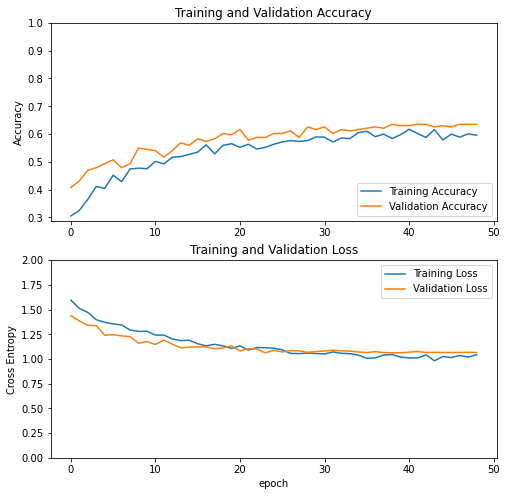

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()



In [ ]:
#Confusion Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix

#num_of_test_samples = 261

Y_pred = model.predict(test_generator)#, num_of_test_samples // batch_size)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')

#Mapping class indices to category names
labels = []
dict = (test_generator.class_indices)
print(dict)
for key, value in dict.items():
   labels.append(key)


print(classification_report(test_generator.classes, y_pred, target_names=labels))

Confusion Matrix
[[29  6  3  9  1]
 [ 6 35  7  1  0]
 [11  8 21  4  2]
 [ 4  5  5 32  2]
 [ 3  1  1  6 14]]
Classification Report
{'Farmhouse': 0, 'Industrial': 1, 'Midcentury': 2, 'Tropical': 3, 'Victorian': 4}
              precision    recall  f1-score   support

   Farmhouse       0.55      0.60      0.57        48
  Industrial       0.64      0.71      0.67        49
  Midcentury       0.57      0.46      0.51        46
    Tropical       0.62      0.67      0.64        48
   Victorian       0.74      0.56      0.64        25

    accuracy                           0.61       216
   macro avg       0.62      0.60      0.61       216
weighted avg       0.61      0.61      0.60       216



In [ ]:
chair_checkpoint_path = '/content/drive/My Drive/Colab Notebooks/checkpoints_test/'
if Path(chair_checkpoint_path).exists():
  epoch_number_array = []
  val_accuracy_array = []
  file_name_array = []
  for file in os.listdir(chair_checkpoint_path):
      epoch, val_ac = re.search(r'(\d\d)_(\d\.\d{4})\.h5', file).group(1,2)
      epoch_number_array.append(int(epoch))
      val_accuracy_array.append(float(val_ac))
      file_name_array.append(file)

      if len(val_accuracy_array) == 0:
        INITIAL_EPOCH = 0
      else:
        highest_acc = val_accuracy_array.index(max(val_accuracy_array))
        INITIAL_EPOCH = epoch_number_array[highest_acc]
        model_checkpoint_callback.best = val_accuracy_array[highest_acc]
        model.load_weights(chair_checkpoint_path + file_name_array[highest_acc])
else:
  os.makedirs(chair_checkpoint_path)
  INITIAL_EPOCH = 0

In [ ]:
print(val_accuracy_array[highest_acc])
print(INITIAL_EPOCH)

0.6351
39


In [ ]:
base_model.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))


# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

base_learning_rate = 0.001

model.compile(optimizer = Adam(learning_rate=base_learning_rate/100),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
              )
model.summary()

len(model.trainable_variables)

Number of layers in the base model:  155
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf_op_layer_RealDiv (TensorF [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub (TensorFlowO [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenetv2_1.40_224 (Functi (None, 7, 7, 1792)        4363712   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1792)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1792)              0         
_________________________________________________________________
dense (Dense)

62

In [ ]:
FINE_EPOCHS = 20


history_fine = model.fit(train_generator,
                        epochs=FINE_EPOCHS,
                        verbose=1,
                        steps_per_epoch=TRAIN_DATASET_SIZE,
                        validation_data=val_generator,
                        validation_steps=VAL_DATASET_SIZE,
                        initial_epoch=INITIAL_EPOCH,
                        callbacks=[model_checkpoint_callback, reduce_lr, early_stopping]
                        )

In [ ]:
model.save('/content/drive/My Drive/ML_models/chair_classifier/model_chair_classifier_finetuned_511.h5')


Enter your URLhttps://aca8cd9d105dbd447097-f6f51e4cef559c9308eef9d726fd38a7.ssl.cf1.rackcdn.com/471091-2.jpg
[[0.08362856 0.77366835 0.09105247 0.04180824 0.00984242]]
Industrial


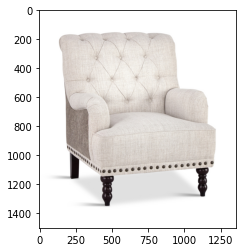

In [ ]:
#TEST
from keras.models import load_model
from keras.preprocessing import image
from skimage.io import imread
from skimage.transform import rescale, resize

model_trained = load_model('/content/drive/My Drive/ML_models/chair_classifier/model_chair_classifier_finetuned_511.h5')

url = input('Enter your URL')
img = imread(url)
plt.imshow(img)
class_names = ["Farmhouse", "Industrial", "Midcentury","Tropical","Victorian"]

img_resized = resize(img,(224,224,3))
img_batch = np.expand_dims(img_resized,axis=0)
prediction_prob_array = model_trained.predict(img_batch)
print(prediction_prob_array)

max_prob_index = prediction_prob_array.argmax(axis=-1)
prediction = class_names[max_prob_index[0]]
print(prediction)


In [ ]:


# #look at augmented images
# for images, labels in ds_train.take(1):
#     plt.figure(figsize=(10, 10))
#     first_image = images[0]
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         augmented_image = img_augmentation(
#             tf.expand_dims(first_image, 0), training=True
#         )
#         plt.imshow(augmented_image[0].numpy().astype("int32"))
#         plt.axis("off")



